# 経済や生物で使う微分方程式

## マルサスの『人口論』と微分方程式
あなたが高校生以上なら社会の授業で次のような言葉を聞いたことがあるかもしれません。

> 人口は制限されなければ幾何級数的に増加するが、
> 生活資源は算術級数的にしか増加しないので生活資源は必ず不足する。

これは有名なマルサスの『人口論』での議論です。
幾何級数はいわゆる等比数列の和で、
算術級数は等差数列の和です。
マルサスは経済学者なので**経済の話**です。
経済の話でこういう数学ネタが出てくるわけです。

ちなみに大学の経済学だと経済の話で微分積分が本当に出てきます。
ときどき経済学部の入試で数学が受験科目に入っていることがあります。
実際に大学に入ってから使うからです。
それも高校の理系のレベルを越えた数学です。
統計データをいろいろいじらないといけないので**統計学**が必要で、
そちらでも割といろいろ数学が必要です。

統計学については「[プログラミングで数学を 中高数学虎の穴](https://phasetr.com/lp/mpgh1/)」で入門的な解説をしています。
興味があればぜひ受講してみてください。

## 微分方程式を立てる
話を元に戻しましょう。
マルサスの人口論に合わせて人口の増え方を考えます。
ここではもっと一般的に生物の集団だと思いましょう。
まずは生物の種類が 1 種類だとして考えます。
生物っぽく人の数というよりも一般に個体数と呼ぶことにして、
時刻 $t$ での個体数を $x (t)$ とします。

個体数の増加率を「単位時間あたりの個体増加量」と「個体数の比」として定義しましょう：数学的には $x'(t) / x (t)$ です。
増加率が一定値 $\alpha$ だとすると「単位時間あたりの個体増加量」が $x'(t)$、
「個体数」が $x(t)$ であり、
これが $\alpha$ に等しいことは $x'(t) / x (t) = \alpha$ と書けます。
この分母を払うと次の微分方程式が出てきます。

\begin{align}
 \frac{d x (t)}{dt}
 =
 \alpha x (t)。
\end{align}

この微分方程式を**マルサスモデル**と言います。
この方程式の解は $x (t) = x (0) e^{\alpha t}$ です：あなたが指数関数の導関数をご存知なら実際に解になっていることはすぐわかるでしょう。

何はともあれ、これで指数関数が出てきました。
等比数列は一般項が $a_n = 2^{n}$ のように指数関数で書けている数列だから、
これを足し上げていけばまさに幾何級数です。
放射性物質の崩壊とは指数の肩の符号が変わっているだけで、
それ以外は同じ式です。
放射性物質の崩壊と生物の個体数の変化を追う方程式が同じ形をしているわけです。

### 注意
先程こう書きました。

> 時刻 $t$ での個体数を $x (t)$ とします。

本当はここはかなり微妙です。
本来 $x (t)$ は整数です。
しかし実はここではいったん実数だと思って処理しています。
このあたりの処理は物理や化学でもよく出てきます。
ここではとてもやりきれませんが、この近似の合理化もきちんとやっておかないといけないことでしょう。
本当は時間についてもいろいろ議論があります。

## シミュレーション
シミュレーションの結果は放射性物質の崩壊のときと基本的に同じです。
いちおうきちんとやっておきましょうか。
まず微分方程式を次のように近似します。

\begin{align}
 \frac{x_{n+1} - x_{n}}{h}
 =
 \alpha x_n、 \quad
 x_{n+1}
 =
 \alpha x_n + h x_n. \tag{1}
\end{align}

この漸化式を解いてみましょう。

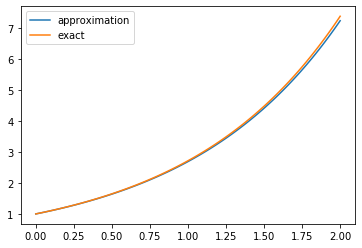

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def malthus_euler(nt, init = 10):
    dt = 2 / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    x[0] = init

    for i in range(1, nt):
        x[i] = x[i-1] + c * dt * x[i-1] # ここで方程式を解いている

    return x

# パラメータ設定
c = 1
init = 1
nt = 101

# 近次解
x_approx = malthus_euler(nt, init)
plt.plot(np.linspace(0, 2, nt), x_approx)

# 厳密解
t = np.linspace(0, 2, nt)
x_exact = init * np.exp(c * t)
plt.plot(t, x_exact)

# 凡例
plt.legend(['approximation', 'exact'])
# 描画
plt.show()

## 放射性物質の崩壊の時との違い

`t` が大きくなると厳密解の方が少し大きくなります。
指数の肩の符号が違うだけなので放射性物質の崩壊で形式的に時間を負の方に伸ばせば同じようにズレが出てくるはずです。

何はともあれ区間の分割数 `nt` を大きくしてみたのが次の結果です。
具体的には 101 から 1001 にしました。

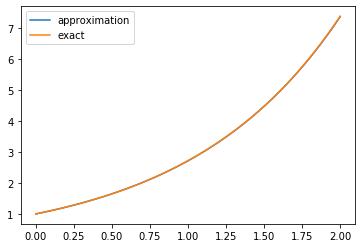

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def malthus_euler(nt, init = 10):
    dt = 2 / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    x[0] = init

    for i in range(1, nt):
        x[i] = x[i-1] + c * dt * x[i-1] # ここで方程式を解いている

    return x

# パラメータ設定
c = 1
init = 1
nt = 1001 # 変更

# 近次解
x_approx = malthus_euler(nt, init)
plt.plot(np.linspace(0, 2, nt), x_approx)

# 厳密解
t = np.linspace(0, 2, nt)
x_exact = init * np.exp(c * t)
plt.plot(t, x_exact)

# 凡例
plt.legend(['approximation', 'exact'])
# 描画
plt.show()

$nt = 101$ よりも近似の精度が良くなりました。
この辺は単純に振る舞ってくれるようです。

## 少し現実的な設定にしてみる
もう少し現実的な設定にしてみます。
個体数 $x (t)$ が大きくなると食糧が足りなかったり、
衛生状態の悪化で病気にかかりやすくなったりして増加率が減るはずです。
そこで増加率 $\alpha$ を $\alpha - \beta x$ ($\alpha, \beta > 0$) に変えてみます。

\begin{align}
 \frac{dx}{dt}
 =
 \left(\alpha - \beta x \right) x.
\end{align}

これには**ロジスティック方程式**という名前がついています。
悪化を $\beta x$ と書くことに必然性はありません。
とりあえずやってみただけです。

## ロジスティック方程式の厳密解
解き方はさておき解は次のように書けます。
あなたがもしこの関数を微分できるなら、
厳密解になることを計算して確認してみてください。
sympy を使ってみてもいいでしょう。

\begin{align}
 x (t)
 =
 \frac{\alpha}{\beta} \frac{1}{1 + e^{- \alpha t}}.
\end{align}

定性的に言うと、増加率が減っていくことで人口が飽和していくことが分かります。

さて、 もとの微分方程式を近似してみましょう。
次のように書けます。

\begin{align}
 \frac{x_{n+1} - x_{n}}{h}
 =
 (\alpha - \beta x_{n}) x_{n}, \quad
 x_{n+1}
 =
 x_n + h (\alpha - \beta x_{n}) x_{n}.
\end{align}

これも厳密解と比較しながら計算してみます。
数値的には $\alpha = 2$, $\beta = 1$ で計算しています。

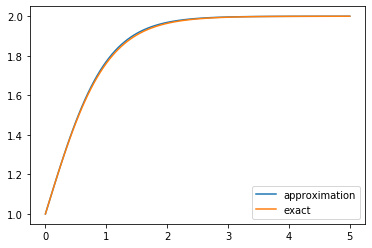

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistics_euler(nt, init = 10):
    dt = T / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    x[0] = init

    for i in range(1, nt):
        x[i] = x[i-1] + dt * (alpha - beta * x[i-1]) * x[i-1] # ここで方程式を解いている

    return x

# パラメータ設定
alpha = 2
beta = 1
init = 1
nt = 101
T = 5 # 時間変化を見る最大値

# 近次解
x_approx = logistics_euler(nt, init)
plt.plot(np.linspace(0, T, nt), x_approx)

# 厳密解
t = np.linspace(0, T, nt)
x_exact = (alpha / beta) / (1 + np.exp(- alpha * t))
plt.plot(t, x_exact)

# 凡例
plt.legend(['approximation', 'exact'])
# 描画
plt.show()

## 時間の刻みを変えてみる
近似解と厳密解にちょっとズレが見えます。
そこで `nt = 101` から `nt = 1001` にしてみましょう。

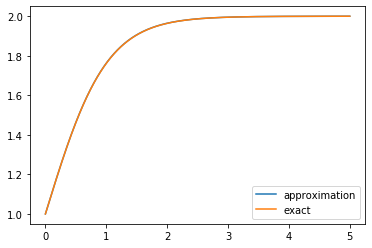

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistics_euler(nt, init = 10):
    dt = T / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    x[0] = init

    for i in range(1, nt):
        x[i] = x[i-1] + dt * (alpha - beta * x[i-1]) * x[i-1]

    return x

# パラメータ設定
alpha = 2
beta = 1
init = 1
nt = 1001
T = 5 # 時間変化を見る最大値

# 近次解
x_approx = logistics_euler(nt, init)
plt.plot(np.linspace(0, T, nt), x_approx)

# 厳密解
t = np.linspace(0, T, nt)
x_exact = (alpha / beta) / (1 + np.exp(- alpha * t))
plt.plot(t, x_exact)

# 凡例
plt.legend(['approximation', 'exact'])
# 描画
plt.show()

こちらも時間の刻みを細かくすると近似がよくなりました。

## 「近似の精度が気になります」
これもよく近似できていることは認めてもらえるのではないでしょうか?
しかし気になる人は「近似の精度はどう決めるのか」と考えているはずです。

もちろんいたって真っ当な指摘です。
ただ、かなり難しい問題がたくさんあり、
いまの時点でなかなかスカっと綺麗に回答できません。
あとで少し考えることにしてここではこのまま進みます。

## 生物学として正しいの?
あなたは数値計算の精度とかそれ以前の問題として、
次のように思っているかもしれません。

- **この微分方程式で実際の生物の増減にあてはめられるのか？**
- **もっと現実的なことを考える必要があるのではないか?**

もちろんこれもいたって真っ当な指摘です。

例えばマルサスモデルでもロジスティック方程式でも右辺が気になります。
実際には成長しないと子作りできません。
その成長が必要だという情報が方程式に盛り込まれていません。

生物で考えるなら食物連鎖があるわけで、
食べられて個体数が減ることだってあります。
天敵が増えたらその個体の数はあおりを受けて激減するはずです。

もちろんこんなことは折り込み済みで、
例えば**遅延型微分方程式**、
**ロトカ-ボルテラ方程式**と呼ばれる方程式が対応しています。
これを調べるのも意味があることで面白いことでもありますが、
今回はこのくらいにしておきましょう。

## 今回のポイント
簡単にまとめると次の通りです。

- 実際にどのくらいよく本当の解を近似できているのかを調べた。
- 経済学や生物のように、 あまり数学との関係がなさそうな分野と数学の関係を紹介した。

## 数学的ポイント: 数列と漸化式
長くなってきましたが最後にちょっと大事な話。

式 (1) で $\alpha = 1$、 $h = 1$ とすると $x_{n+1} = 2 x_n$ になります。
この漸化式は高校でも出てくるやつで、 もちろん公比 $2$ の等比数列の漸化式です。
底が $2$ か $e$ かの違いはあっても指数関数で書けることは同じです。
これはたまたまではなくて数学的に意味があることです。

$x_{n+1} - x_{n}$ のように数列の隣の項の差を差分と言うことがあります。
もちろん微分との関係を強く意識した言葉です。
数列の問題、 もっと言えば漸化式の問題は微分方程式とも深い関係があります。

広く力学系と呼ばれる分野にまで広がります。
力学系まで行くととんでもなく難しくなるのでとてもここで紹介はできません。
でも幾何学とも関係してきたり整数論とも関係してきたり、
射程範囲は広いです。

ここで必要以上にあまり深入りはしませんが、
数学や物理に興味があるなら覚えておくといろいろ楽しいことがあります。

# アンケート
毎回アンケートを取っています。
質問や要望がある場合もこちらにどうぞ。

- [アンケートへのリンク](https://goo.gl/forms/hn7bUP4sblqOkBcI3)

アンケートは匿名なので気楽にコメントしてください。
直接返事してほしいことがあれば、
メールなど適当な手段で連絡してください。